## Preproccesing Data (Extracting Data)
### Meteorite Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read Meteorite data and sort them by yeras
df_meteorite = pd.read_csv("Meteorite_Landings.csv").sort_values(by=['year'])

# drop rows with NAN value
df_meteorite = df_meteorite.dropna()

# drop unnecessary columns
##### GeoLocation - reclat and reclong exsits
##### nametype & id - not needed
df_meteorite = df_meteorite.drop(columns={'GeoLocation', 'nametype', 'id'})

# Change the format of date MM/DD/YYYY to YYYY
df_meteorite['year'] = df_meteorite['year'].str.slice(6, 10)
print(df_meteorite.shape)
df_meteorite.head()

(38116, 7)


name     recclass    mass (g)   fall  year    reclat  \
174    Castrovillari   Stone-uncl     15000.0   Fell  1583  39.80000   
26166         Morito  Iron, IIIAB  10100000.0  Found  1600  27.05000   
410        Jalandhar         Iron      1967.0   Fell  1621  31.00000   
956     Stretchleigh   Stone-uncl     10400.0   Fell  1623  50.38333   
369          Hatford   Stone-uncl     29000.0   Fell  1628  51.65000   

         reclong  
174     16.20000  
26166 -105.43333  
410     75.00000  
956     -3.95000  
369     -1.51667

<hr />

### Natural Disaster Data


In [4]:
# Read Natural Disaster data
# ND = Natural Disaster
df_NDOriginal= pd.read_csv("natural_disaster.csv")
# df_NDOriginal.dropna().head()

In [5]:
# Create new dateframe with only necessary columns
df_ND = pd.DataFrame({'Year':df_NDOriginal['Incident Begin Date'],
                   'Incident Type':df_NDOriginal['Incident Type'], 
                   'Title':df_NDOriginal['Title'],
                   'Declared County':df_NDOriginal['Declared County/Area']})

df_ND['Year'] = (pd.to_datetime(df_ND['Year'])).dt.year
# drop any row with NAN value
df_ND = df_ND.dropna()

print(df_ND.shape)
df_ND.head()

(48193, 4)


Year Incident Type      Title       Declared County
0  2018          Fire  WILDFIRES        Butte (County)
1  2018          Fire  WILDFIRES  Los Angeles (County)
2  2018          Fire  WILDFIRES      Ventura (County)
3  2018          Fire  WILDFIRES        Butte (County)
4  2018          Fire  WILDFIRES  Los Angeles (County)

<hr />

## Observing Data

### Observe number of natural disasters occured per year (1959 ~ 2018)

Years  Natural Disaster Occurence
0    1959                           1
1    1960                           0
2    1961                           0
3    1962                           0
4    1963                           0
5    1964                         115
6    1965                         429
7    1966                         120
8    1967                         197
9    1968                         162
10   1969                         505
11   1970                         221
12   1971                         170
13   1972                         526
14   1973                         863
15   1974                         619
16   1975                         460
17   1976                         586
18   1977                        1160
19   1978                         440
20   1979                         476
21   1980                         200
22   1981                          61
23   1982                         147
24   1983                         215
25   1984                         253
26   1985                         328
27   1986                         284
28   1987                         163
29   1988                          50
30   1989                         504
31   1990                         762
32   1991                         428
33   1992                         380
34   1993                        1704
35   1994                         676
36   1995                         656
37   1996                        1717
38   1997                         833
39   1998                        1540
40   1999                        1321
41   2000                        1348
42   2001                         887
43   2002                        1088
44   2003                        1587
45   2004                        1985
46   2005                        4978
47   2006                         705
48   2007                        1553
49   2008                        2280
50   2009                        1513
51   2010                        1344
52   2011                        2647
53   2012                        1281
54   2013                         738
55   2014                         637
56   2015                        1246
57   2016                         818
58   2017                        1655
59   2018                         631

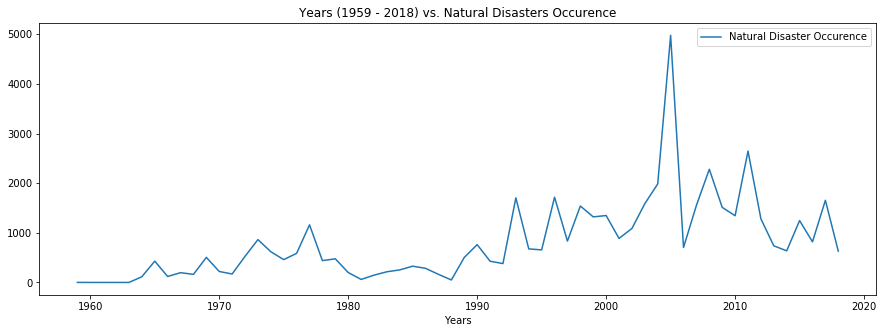

In [6]:
# Sort natural disaster data frame by type of disasters
df_ND = df_ND.sort_values(by=['Year'])

# Count number of disasters occured per year
years = df_ND['Year'].values

minYear = years[0]
maxYear = years[-1]
years_freq = [0] * (maxYear - minYear + 1)

for x in years:
    years_freq[x-minYear] = years_freq[x-minYear] + 1

# 1960, 61, 62,, and 63 doesn't exist in original, 
# so i'm going to create new datafram with these years included
years = []
{years.append(x) for x in range(minYear, maxYear+1)}

years_xy = pd.DataFrame({'Years':years, 'Natural Disaster Occurence':years_freq})
years_xy.plot(x='Years', y='Natural Disaster Occurence', figsize=(15,5),
             title="Years (1959 - 2018) vs. Natural Disasters Occurence")

years_xy

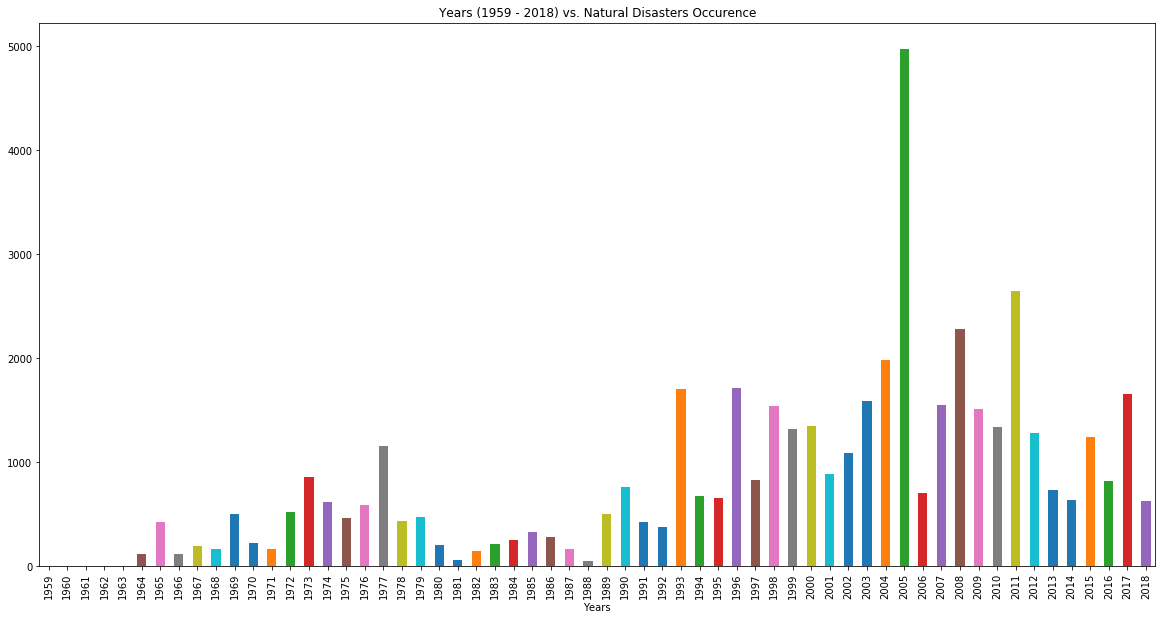

In [7]:
years_xy.plot(x='Years', y='Natural Disaster Occurence', kind='bar', figsize=(20,10),
             title="Years (1959 - 2018) vs. Natural Disasters Occurence", legend=False)

> The above graph shows the year 2005 had far more number of natural disasters compare to any other yeras. [Was 2005 the year of natural disasters?](http://www.who.int/bulletin/volumes/84/1/news10106/en/)

<hr />

### Observe number of meteorite impacts occured per year (1959 ~ 2018)

[Meteorites, Impcats, and Mass Extinction](http://www.tulane.edu/~sanelson/Natural_Disasters/impacts.htm)

In [8]:
df_meteorite['year'].values

df_meteoYear = df_meteorite.sort_values(by=['year'])['year']

In [9]:
df_meteo_yr = [int(yr) for yr in df_meteoYear.value_counts().index]

In [10]:
df_meteo_counts = df_meteoYear.value_counts().values

In [11]:
counts = [(pair[0], pair[1]) for pair in zip(df_meteo_yr,df_meteo_counts)]
dm_yr = [yr for (yr,count) in counts if ((yr > 1960) & (yr < 2019))]
dm_cnt = [count for (yr,count) in counts if ((yr > 1960) & (yr < 2019))]

In [12]:
dm = pd.DataFrame({'year':dm_yr, 'total_count':dm_cnt})

<BarContainer object of 53 artists>

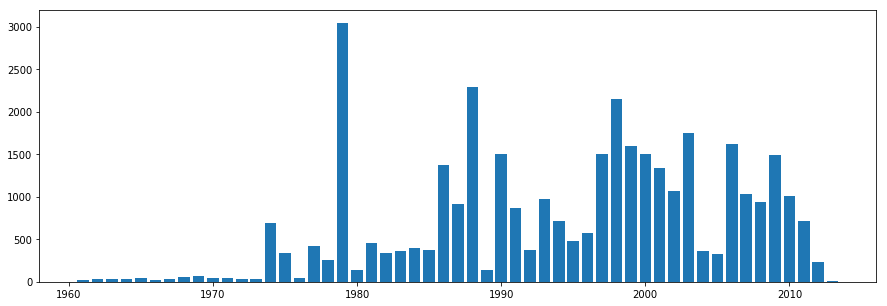

In [13]:
plt.figure(figsize=(15,5))
plt.bar(dm_yr, dm_cnt)

In [14]:
ndo = years_xy[(years_xy['Years'][:] > 1960) & (years_xy['Years'][:] <= 2013)]

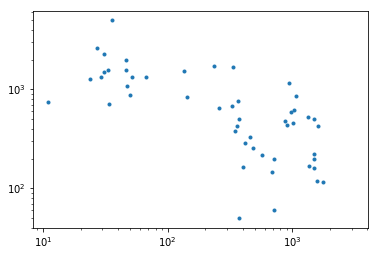

In [15]:
plt.loglog(dm_cnt, ndo['Natural Disaster Occurence'], '.')

In [16]:
df_meteorite['year'] = df_meteorite['year'].apply(lambda x: int(x))

In [17]:
df_m = df_meteorite[(df_meteorite['year'][:] > 1960) & (df_meteorite['year'][:] <= 2013)]

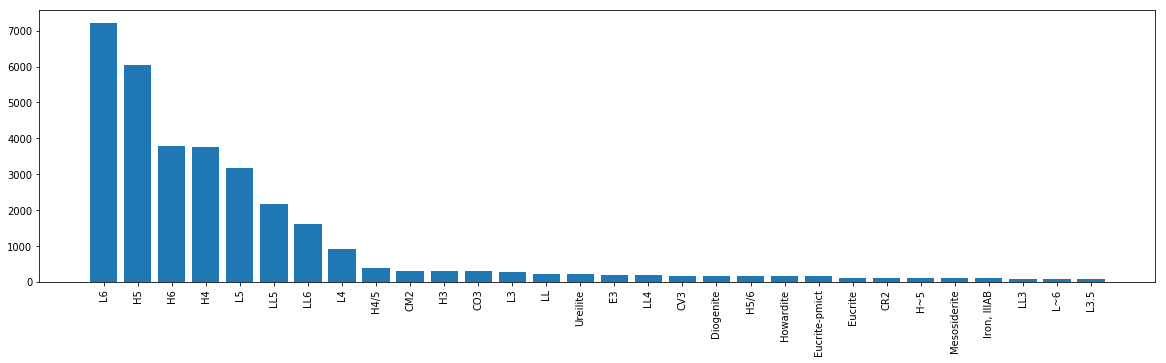

In [18]:
plt.figure(figsize=(20,5))
plt.bar(df_m['recclass'].value_counts().index[0:30], df_m['recclass'].value_counts().values[0:30])
_ = plt.xticks(rotation=90)

In [19]:
ndo = ndo.rename(columns={'Years': 'year'})

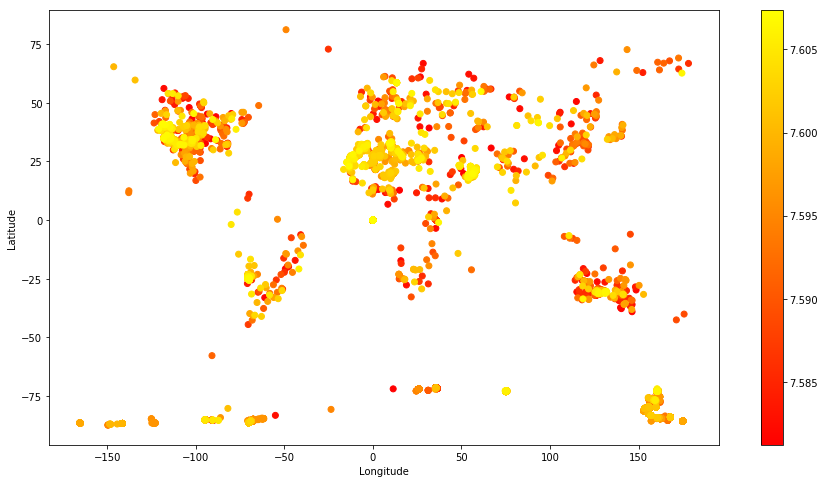

In [20]:
color_yr = [np.log(year) for year in df_m['year']]

plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_yr, cmap=plt.cm.autumn)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [21]:
color_mass = [np.log(mass) for mass in df_m['mass (g)']]

/home/jmyoi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


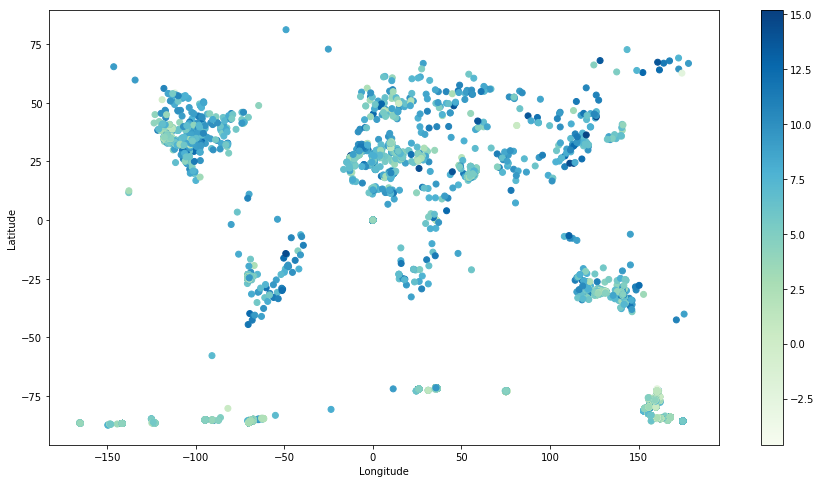

In [22]:
plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_mass, cmap=plt.cm.GnBu)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [23]:

class_name = [] 
max_count = []
avg_mass = []
max_mass = []
for yr in ndo['year']:
    class_name.append(df_m.recclass[df_m['year']==yr].value_counts().index[0])
    max_count.append(df_m.recclass[df_m['year']==yr].value_counts()[0])
    max_mass.append(max(df_m['mass (g)'][df_m['year']==yr].values))
    avg_mass.append(np.mean(df_m['mass (g)'][df_m['year']==yr].values))

In [24]:
dm = dm[(dm['year'][:]>1960) & (dm['year'][:] <= 2013) ]

In [25]:
final = pd.DataFrame({'year':ndo['year'], 
                      'ndo':ndo['Natural Disaster Occurence'], 
                      'max_class':class_name, 
                      'max_count':max_count,
                      'avg_mass':avg_mass,
                      'max_mass':max_mass})
final = final.merge(dm, on='year')

In [29]:
final

year   ndo max_class  max_count       avg_mass   max_mass  total_count
0   1961     0        H5          7   22980.240741   283000.0           27
1   1962     0        L6          8   15354.877778   100000.0           36
2   1963     0        L6         10   11858.309091   132700.0           33
3   1964   115        OC          5  113838.980645  3000000.0           31
4   1965   429        H4          7   22251.852174   450000.0           46
5   1966   120        L4          4   60791.166667   900000.0           24
6   1967   197        L6          6   49295.114706   630000.0           34
7   1968   162        H5         16   44255.273462  1225300.0           52
8   1969   505        H5         19   39047.394030  2000000.0           67
9   1970   221        L6         11    8525.741304   110700.0           46
10  1971   170        H5         10   13603.131915   279000.0           47
11  1972   526        L5          6   11425.925806    93000.0           31
12  1973   863        H6          6   53605.117241  1200000.0           29
13  1974   619        H5        239     314.929942    47000.0          691
14  1975   460        L6        211    1014.681964    69000.0          336
15  1976   586        L6         10  151278.742000  4000000.0           50
16  1977  1160        H5        176    1308.007190    75500.0          420
17  1978   440        H5         83    3010.647692   138300.0          260
18  1979   476        H4        709     150.329113    44500.0         3045
19  1980   200        L6         35    1637.313007   100000.0          143
20  1981    61        H5        159    4772.673319  1000000.0          458
21  1982   147        L6         89     631.511773    75000.0          344
22  1983   215        L6        109    7058.648802  2000000.0          359
23  1984   253        H5        105    2022.634652   168400.0          402
24  1985   328        H5        107     696.690186   110224.0          377
25  1986   284        H4        616     532.033028   260000.0         1374
26  1987   163        L6        322     519.099387    50000.0          914
27  1988    50        H5        569     211.675808    65000.0         2295
28  1989   504        H5         35    3495.514815   105000.0          135
29  1990   762        L6        927     572.333938   325000.0         1506
30  1991   428        L6        247    1040.851738   350000.0          869
31  1992   380        L6        105    7805.776559  2000000.0          372
32  1993  1704        L5        312     171.592602    36900.0          976
33  1994   676        L5        201    1055.372483   360000.0          717
34  1995   656        L6        139    2297.392624   280000.0          484
35  1996  1717        L6        181     700.832705   140000.0          573
36  1997   833       LL5        812     651.756844   290000.0         1505
37  1998  1540        H4        485     960.402189  1100000.0         2147
38  1999  1321       LL5        626     547.117153    95000.0         1592
39  2000  1348        H6        248    1965.472752  1003000.0         1502
40  2001   887        H5        223     701.111613    50200.0         1339
41  2002  1088        H5        197    1691.566698   550000.0         1066
42  2003  1587        L6        487     425.163432   160000.0         1754
43  2004  1985        H5         67    9885.014590  3000000.0          366
44  2005  4978        H5         43    2533.770366   200000.0          328
45  2006   705        L6        484    2482.544066  3000000.0         1616
46  2007  1553        H6        187     604.742160   100000.0         1038
47  2008  2280       LL6        266    1509.977049   499500.0          936
48  2009  1513        L6        351    1523.091791  1600000.0         1496
49  2010  1344        L6        185     633.563940   100000.0         1005
50  2011  2647        L6        114    1070.849593   115777.0          713
51  2012  1281        L6         22     992.383248    18000.0          234
52  2013   738       LL6     

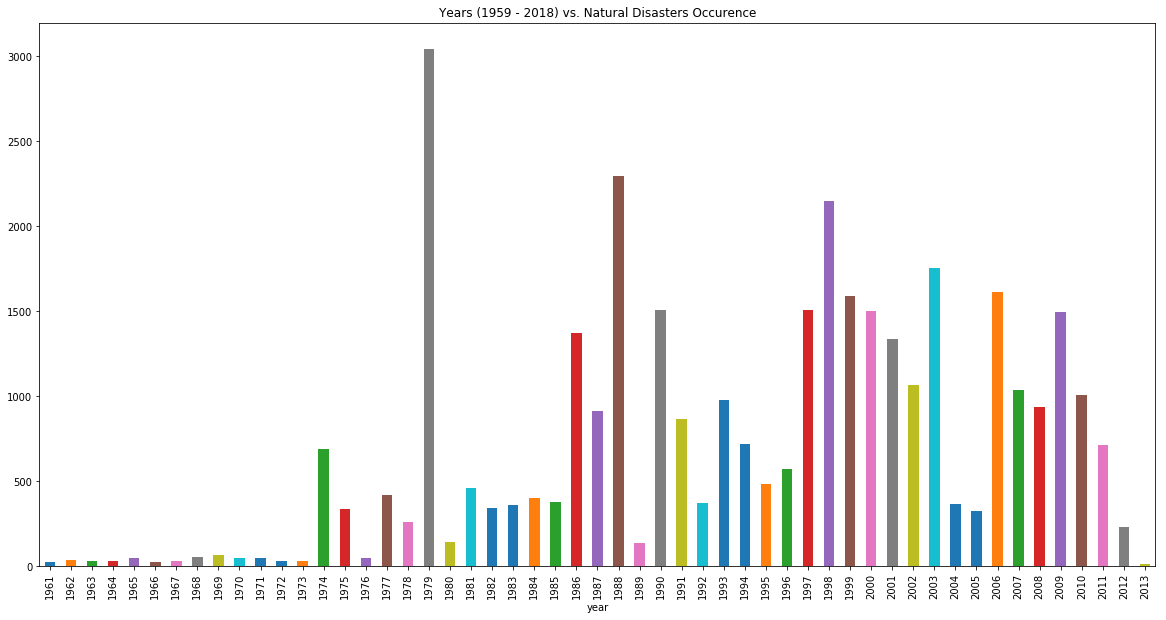

In [240]:
final.plot(x='year', y='total_count', kind='bar', figsize=(20,10),
             title="Years (1959 - 2018) vs. Natural Disasters Occurence", legend=False)